In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..\.vscode\posco_analysis'))
	print(os.getcwd())
except:
	pass


In [155]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn import metrics


In [156]:
df_custom = pd.read_csv("data/통신고객이탈.csv",engine='python')
df_custom.head()


,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [157]:
df_custom.isnull().sum(axis=0)


CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [158]:
df_custom.tail()


,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
925,Churned,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3
929,Churned,K416650,F,30,Play 300,SOP10,Med,31.47,12,16,306.6,37,109.8,367,957.0


In [159]:
df_custom.columns


Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')

In [160]:
df_custom.columns.value_counts()


WEEKEND_CALLS_TIME    1
SERVICE_DURATION      1
PEAK_CALLS_NO         1
TOTAL_CALLS_TIME      1
GENDER                1
HANDSET               1
DROPPED_CALLS         1
TOTAL_CALLS_NO        1
CHARGE_TYPE           1
AGE                   1
CHURN                 1
PEAK_CALLS_TIME       1
CUSTOMER_ID           1
WEEKEND_CALLS_NO      1
USAGE_BAND            1
dtype: int64

In [161]:
df_custom.columns.values


array(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'], dtype=object)

In [162]:
df_custom.columns.unique()


Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')

In [163]:
df_custom['CHURN'].unique()


array(['Active', 'Churned'], dtype=object)

In [164]:
df_custom['CHARGE_TYPE'].value_counts()


CAT 200     394
CAT 100     187
Play 100    155
Play 300    137
CAT 50       57
Name: CHARGE_TYPE, dtype: int64

In [165]:
df_custom.drop("CUSTOMER_ID",axis = 1, inplace = True)


In [166]:
df_custom.CHURN.replace(to_replace = "Active", value = 0, inplace = True) 
df_custom.CHURN.replace(to_replace = "Churned", value = 1, inplace = True) 


In [167]:
df_custom

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
5,0,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,0,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
7,0,M,36,CAT 100,ASAD170,Med,54.87,2,522,801.6,0,0.0,558,884.7
8,0,F,43,CAT 100,S50,Med,11.23,0,156,516.6,8,84.0,362,987.6
9,0,F,50,CAT 100,ASAD170,Med,49.97,0,136,466.2,13,31.8,186,632.7


In [168]:
#STEP2 데이터분할
#random seed :고정 -> 매번 실행시 같은 값을 얻음
np.random.seed(seed= 1234)
#0.7(70%)보다 작으면 true -> train data , 아니면 false -> test데이터
msk = np.random.rand(df_custom.shape[0],)<0.7
df_custom_train = df_custom[msk]
df_custom_test = df_custom[~msk]
# train데이터와 test데이터 크기
print("train data size: {}".format(df_custom_train.shape))
print("test data size: {}".format(df_custom_test.shape))


train data size: (635, 14)
test data size: (295, 14)


In [169]:
df_custom_train

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,0,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,0,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
10,0,M,52,CAT 100,S80,Med,11.00,0,81,682.2,20,58.8,170,943.5
11,0,F,28,CAT 100,S50,Med,13.50,0,212,733.2,0,0.0,226,798.3
12,0,F,29,CAT 100,S80,Med,51.77,0,114,595.8,0,0.0,150,720.9
14,0,F,37,CAT 100,S80,Med,50.83,2,12,579.6,22,42.0,54,869.1
15,0,M,46,CAT 100,S50,Med,29.23,0,3,719.4,13,20.5,106,933.7


In [170]:
#STEP.2 train데이터에 상수추가
df_custom_train = sm.add_constant(df_custom_train)
df_custom_train.head()

C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2


In [171]:
#STEP .2 train데이터 전처리
# df_custom['CHURN'].value_counts()
# df_custom_train.CHURN.replace(to_replace = "Active", value = 0, inplace = True) 
# df_custom_train.CHURN.replace(to_replace = "Churned", value = 1, inplace = True) 
# df_custom_test.CHURN.replace(to_replace = "Active", value = 0, inplace = True) 
# df_custom_test.CHURN.replace(to_replace = "Churned", value = 1, inplace = True) 


In [172]:
df_custom_train


,const,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
10,1.0,0,M,52,CAT 100,S80,Med,11.00,0,81,682.2,20,58.8,170,943.5
11,1.0,0,F,28,CAT 100,S50,Med,13.50,0,212,733.2,0,0.0,226,798.3
12,1.0,0,F,29,CAT 100,S80,Med,51.77,0,114,595.8,0,0.0,150,720.9
14,1.0,0,F,37,CAT 100,S80,Med,50.83,2,12,579.6,22,42.0,54,869.1
15,1.0,0,M,46,CAT 100,S50,Med,29.23,0,3,719.4,13,20.5,106,933.7


In [173]:
#STEP.3 
#from_formula 함수를 이용하여 변수 역할 지정
log_model = sm.Logit.from_formula('''CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME''',df_custom_train)
#적합
log_result = log_model.fit(method= 'bfgs')
#결과출력
print(log_result.summary())


C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

         Current function value: 0.261293
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                           29
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:                  0.4660
Time:                        01:23:21   Log-Likelihood:                -165.92
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 9.369e-45
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.1342      2

In [174]:
# STEP 4.예측 및 성능평가
#로지스틱 모델로 test데이터 예측
y_pred = log_result.predict(df_custom_test)
# 0과 1의 값을 가진 class로 변환
# 로지스틱회귀 (50%를 기준으로 예측값을 나눔)
y_pred_class = (y_pred > 0.5).astype(int)
# 상위 5건 출력
y_pred_class.head()


3    0
4    0
7    0
8    0
9    0
dtype: int32

In [175]:
df_custom_test["CHURN"]

3      0
4      0
7      0
8      0
9      0
13     0
18     0
19     0
24     0
27     0
30     0
32     0
34     0
35     0
37     0
39     0
55     0
56     0
57     0
58     0
59     0
67     0
70     0
75     0
82     0
84     0
86     0
87     0
93     0
97     0
      ..
850    1
854    1
857    1
858    1
861    1
863    1
866    1
867    1
869    1
871    1
872    1
874    1
878    1
881    1
886    1
891    1
893    1
894    1
896    1
897    1
900    1
903    1
907    1
916    1
917    1
918    1
921    1
923    1
924    1
925    1
Name: CHURN, Length: 295, dtype: int64

In [176]:
# 정확도 측정, 실제 목표변수의 값과 예측된 값들을 비교하여 정확도를 측정
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(df_custom_test["CHURN"],y_pred_class)))


Accuracy:0.898


,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
5,0,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,0,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2
7,0,M,36,CAT 100,ASAD170,Med,54.87,2,522,801.6,0,0.0,558,884.7
8,0,F,43,CAT 100,S50,Med,11.23,0,156,516.6,8,84.0,362,987.6
9,0,F,50,CAT 100,ASAD170,Med,49.97,0,136,466.2,13,31.8,186,632.7


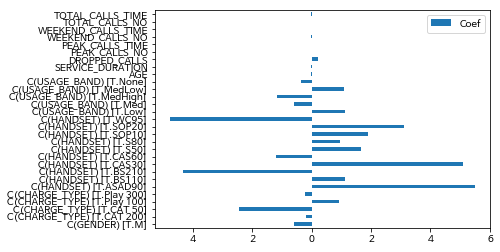

In [177]:
# 설명변수의 중요도
df_logistic_coef = pd.DataFrame({"Coef":log_result.params.values[1:]},index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

df_custom

In [178]:
#STEP 5. 결론도출 - 표준화 회귀계수
#select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_custom_char = df_custom.select_dtypes(include = "object") # 범주형 포함
df_custom_numeric = df_custom.select_dtypes(exclude = "object") # 범주형 미포함


In [179]:
df_custom_numeric
# data scale
# 숫자형 데이터로 scale - 연속형 변수들의 값들을 scale(표준화)하여 목표변수에 영향을 미치는 정도의 차이를 비교한다.
df_custom_char_train = df_custom_char[msk]
df_custom_numeric_scaled_train = scale(df_custom_numeric[msk])
df_custom_numeric_scaled_train = pd.DataFrame(df_custom_numeric_scaled_train,columns = df_custom_numeric.columns)
df_custom_numeric_scaled_train.head()



C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,-0.487665,-0.061287,-0.066658,0.936779,-0.050954,-0.622843,-0.431938,-0.777862,0.069711,-0.778293
1,-0.487665,-0.366521,-0.240702,2.073082,0.618542,-0.088273,-0.309382,-0.601091,0.247156,-0.454921
2,-0.487665,-0.366521,1.070294,2.357157,0.130457,-0.232062,-0.983441,-1.374462,-0.328554,-0.811538
3,-0.487665,1.464884,1.072417,0.084552,0.255718,-0.416436,-0.922163,-0.496134,0.310247,-0.286151
4,-0.487665,-0.137596,-0.139530,0.936779,0.851786,0.053197,-0.248104,0.083895,0.558670,-0.279066


In [180]:
df_custom_numeric_scaled_train["CHURN"] = np.where(df_custom_numeric_scaled_train["CHURN"] > 0, 1, 0)
df_custom_numeric_scaled_train.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,-0.061287,-0.066658,0.936779,-0.050954,-0.622843,-0.431938,-0.777862,0.069711,-0.778293
1,0,-0.366521,-0.240702,2.073082,0.618542,-0.088273,-0.309382,-0.601091,0.247156,-0.454921
2,0,-0.366521,1.070294,2.357157,0.130457,-0.232062,-0.983441,-1.374462,-0.328554,-0.811538
3,0,1.464884,1.072417,0.084552,0.255718,-0.416436,-0.922163,-0.496134,0.310247,-0.286151
4,0,-0.137596,-0.139530,0.936779,0.851786,0.053197,-0.248104,0.083895,0.558670,-0.279066


In [181]:
# scale 된 숫자형 데이터와 범주형 데이터의 결합
df_custom_scaled_train = pd.concat([df_custom_numeric_scaled_train,df_custom_char_train.reset_index(drop = True)], axis = 1)

In [182]:
df_custom_scaled_train

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER,CHARGE_TYPE,HANDSET,USAGE_BAND
0,0,-0.061287,-0.066658,0.936779,-0.050954,-0.622843,-0.431938,-0.777862,0.069711,-0.778293,F,CAT 100,ASAD170,Med
1,0,-0.366521,-0.240702,2.073082,0.618542,-0.088273,-0.309382,-0.601091,0.247156,-0.454921,M,CAT 100,S50,Med
2,0,-0.366521,1.070294,2.357157,0.130457,-0.232062,-0.983441,-1.374462,-0.328554,-0.811538,M,CAT 100,ASAD170,Med
3,0,1.464884,1.072417,0.084552,0.255718,-0.416436,-0.922163,-0.496134,0.310247,-0.286151,M,CAT 100,S80,Med
4,0,-0.137596,-0.139530,0.936779,0.851786,0.053197,-0.248104,0.083895,0.558670,-0.279066,F,CAT 100,ASAD170,Med
5,0,1.541193,-1.646504,-0.767675,-0.642703,-0.038411,0.242121,0.249617,-0.703159,-0.213120,M,CAT 100,S80,Med
6,0,-0.290213,-1.469629,-0.767675,-0.076870,0.060154,-0.983441,-1.374462,-0.482339,-0.476903,F,CAT 100,S50,Med
7,0,-0.213904,1.237972,-0.767675,-0.500165,-0.205391,-0.983441,-1.374462,-0.782023,-0.617515,F,CAT 100,S80,Med
8,0,0.396564,1.171467,-0.199524,-0.940737,-0.236700,0.364677,-0.214406,-1.160572,-0.348282,F,CAT 100,S80,Med
9,0,1.083341,-0.356732,-0.767675,-0.979611,0.033484,-0.186826,-0.808244,-0.955525,-0.230923,M,CAT 100,S50,Med


In [183]:
'''# All columns (except medv)
model = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df)
result = model.fit()'''

#from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = sm.Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME""",df_custom_scaled_train)
#적합
#적합
scaled_log_result = scaled_log_model.fit(method= 'bfgs')
print(scaled_log_result.summary())


         Current function value: 0.262450
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                           29
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:                  0.4636
Time:                        01:23:22   Log-Likelihood:                -166.66
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 1.824e-44
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.9105      1

C:\Users\znzla\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


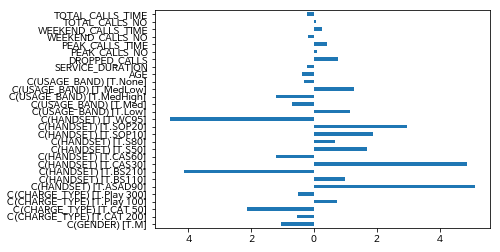

In [184]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend = False)

